In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import datetime as dt
import seaborn as sns


# Import data
path = "No-Show Data.csv"

noshow_df = pd.read_csv(path)

In [2]:
noshow_df

,Patient_ID,Age,Gender,Insurance_Type,Chronic_Disease,Mental_Health_Status,Employment_Status,Education_Level,Transportation_Access,Distance_from_Facility,Area_Type,Booking_Date,Appointment_Date,Appointment_Outcome
0,75763,93.0,Male,Medicare,False,True,Student,Advanced Degree,True,37.785038,Suburban,11/4/2023,8/15/2024,Show
1,84945,52.0,Male,Uninsured,False,False,Employed,College,True,NaN,Rural,10/28/2023,7/11/2024,No-Show
2,88559,8.0,Male,Medicare,True,NaN,NaN,Advanced Degree,True,27.277654,Rural,2/12/2023,10/26/2024,Show
3,72217,5.0,Other,Medicare,False,True,Student,College,True,44.618708,NaN,1/30/2023,1/31/2024,Show
4,44071,76.0,Male,Uninsured,True,False,Employed,Advanced Degree,False,12.568497,Urban,11/27/2023,3/3/2024,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,16333,48.0,Female,NaN,True,True,Student,NaN,True,26.576418,Urban,11/24/2023,3/16/2024,No-Show
49996,11153,5.0,Other,Medicaid,True,True,Student,NaN,False,20.674054,Suburban,11/29/2023,12/5/2023,No-Show
49997,15966,92.0,Female,Uninsured,False,True,Student,NaN,True,34.457721,Suburban,11/20/2022,7/27/2024,NaN
49998,41988,53.0,Male,Medicaid,False,False,Employed,College,False,21.190068,Suburban,5/2/2023,12/19/2023,No-Show


In [3]:
# Only want to inlcude rows that have values for the outcome we are trying to predict
noshow_df = noshow_df.dropna(subset=['Appointment_Outcome'])
noshow_df

,Patient_ID,Age,Gender,Insurance_Type,Chronic_Disease,Mental_Health_Status,Employment_Status,Education_Level,Transportation_Access,Distance_from_Facility,Area_Type,Booking_Date,Appointment_Date,Appointment_Outcome
0,75763,93.0,Male,Medicare,False,True,Student,Advanced Degree,True,37.785038,Suburban,11/4/2023,8/15/2024,Show
1,84945,52.0,Male,Uninsured,False,False,Employed,College,True,NaN,Rural,10/28/2023,7/11/2024,No-Show
2,88559,8.0,Male,Medicare,True,NaN,NaN,Advanced Degree,True,27.277654,Rural,2/12/2023,10/26/2024,Show
3,72217,5.0,Other,Medicare,False,True,Student,College,True,44.618708,NaN,1/30/2023,1/31/2024,Show
6,34403,15.0,Female,Medicaid,NaN,False,Unemployed,High School,True,34.033755,Suburban,8/13/2023,7/23/2024,Show
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49993,91361,57.0,Female,Private,True,False,Student,High School,True,28.410940,Suburban,1/26/2024,3/1/2024,Show
49995,16333,48.0,Female,NaN,True,True,Student,NaN,True,26.576418,Urban,11/24/2023,3/16/2024,No-Show
49996,11153,5.0,Other,Medicaid,True,True,Student,NaN,False,20.674054,Suburban,11/29/2023,12/5/2023,No-Show
49998,41988,53.0,Male,Medicaid,False,False,Employed,College,False,21.190068,Suburban,5/2/2023,12/19/2023,No-Show


In [4]:
noshow_df.dtypes

Patient_ID                  int64
Age                       float64
Gender                     object
Insurance_Type             object
Chronic_Disease            object
Mental_Health_Status       object
Employment_Status          object
Education_Level            object
Transportation_Access      object
Distance_from_Facility    float64
Area_Type                  object
Booking_Date               object
Appointment_Date           object
Appointment_Outcome        object
dtype: object

In [5]:
# No duplicates
dup_patients = noshow_df[noshow_df.duplicated(['Patient_ID'])]
dup_patients

,Patient_ID,Age,Gender,Insurance_Type,Chronic_Disease,Mental_Health_Status,Employment_Status,Education_Level,Transportation_Access,Distance_from_Facility,Area_Type,Booking_Date,Appointment_Date,Appointment_Outcome


In [6]:
# Convert 'Booking_Date' and 'Appointment_Date' columns to datetime if not already
noshow_df[['Booking_Date', 'Appointment_Date']] = noshow_df[['Booking_Date', 'Appointment_Date']].apply(pd.to_datetime, errors='coerce')

# Calculate the difference in days, handling NaT values
diff = (noshow_df['Appointment_Date'] - noshow_df['Booking_Date']).dt.days

# Insert 'Days Diff' column at position 13
noshow_df.insert(13, 'Days Diff', diff)

noshow_df

C:\Users\lucas\AppData\Local\Temp\ipykernel_16164\4113902921.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  noshow_df[['Booking_Date', 'Appointment_Date']] = noshow_df[['Booking_Date', 'Appointment_Date']].apply(pd.to_datetime, errors='coerce')


,Patient_ID,Age,Gender,Insurance_Type,Chronic_Disease,Mental_Health_Status,Employment_Status,Education_Level,Transportation_Access,Distance_from_Facility,Area_Type,Booking_Date,Appointment_Date,Days Diff,Appointment_Outcome
0,75763,93.0,Male,Medicare,False,True,Student,Advanced Degree,True,37.785038,Suburban,2023-11-04,2024-08-15,285,Show
1,84945,52.0,Male,Uninsured,False,False,Employed,College,True,NaN,Rural,2023-10-28,2024-07-11,257,No-Show
2,88559,8.0,Male,Medicare,True,NaN,NaN,Advanced Degree,True,27.277654,Rural,2023-02-12,2024-10-26,622,Show
3,72217,5.0,Other,Medicare,False,True,Student,College,True,44.618708,NaN,2023-01-30,2024-01-31,366,Show
6,34403,15.0,Female,Medicaid,NaN,False,Unemployed,High School,True,34.033755,Suburban,2023-08-13,2024-07-23,345,Show
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49993,91361,57.0,Female,Private,True,False,Student,High School,True,28.410940,Suburban,2024-01-26,2024-03-01,35,Show
49995,16333,48.0,Female,NaN,True,True,Student,NaN,True,26.576418,Urban,2023-11-24,2024-03-16,113,No-Show
49996,11153,5.0,Other,Medicaid,True,True,Student,NaN,False,20.674054,Suburban,2023-11-29,2023-12-05,6,No-Show
49998,41988,53.0,Male,Medicaid,False,False,Employed,College,False,21.190068,Suburban,2023-05-02,2023-12-19,231,No-Show


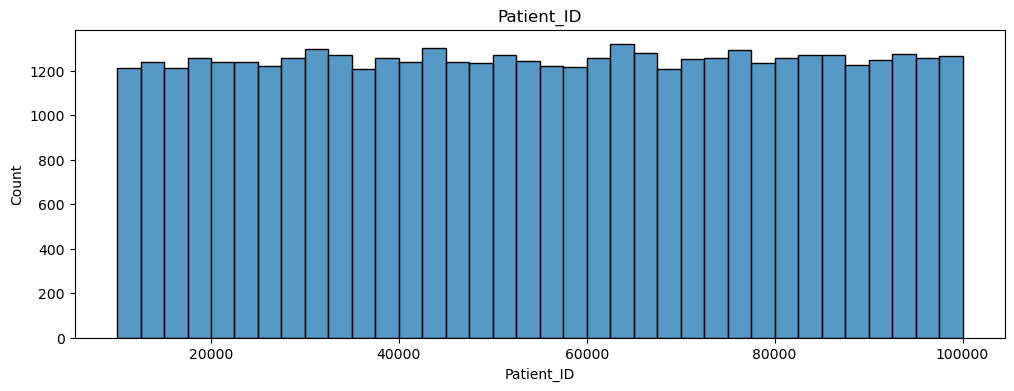

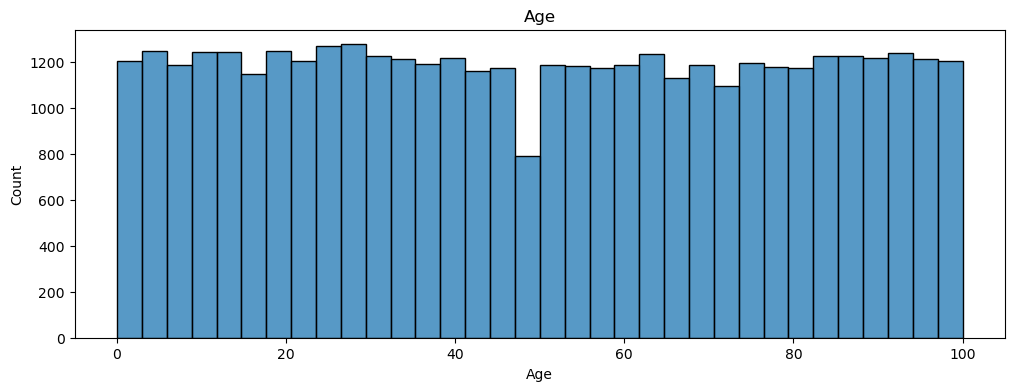

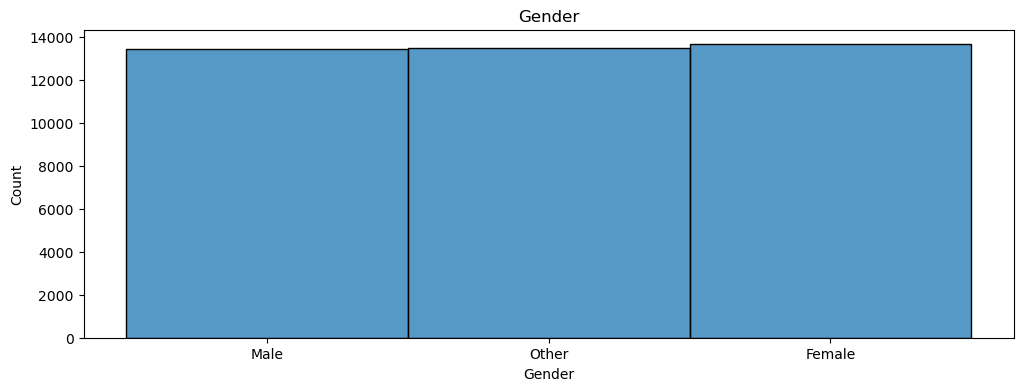

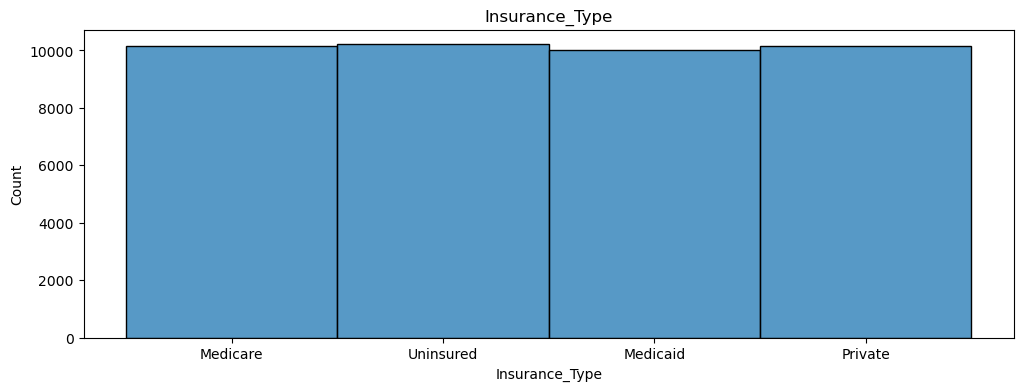

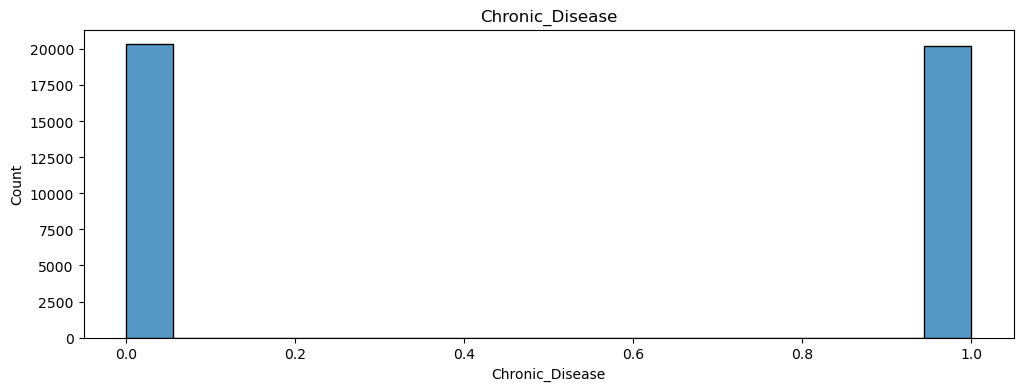

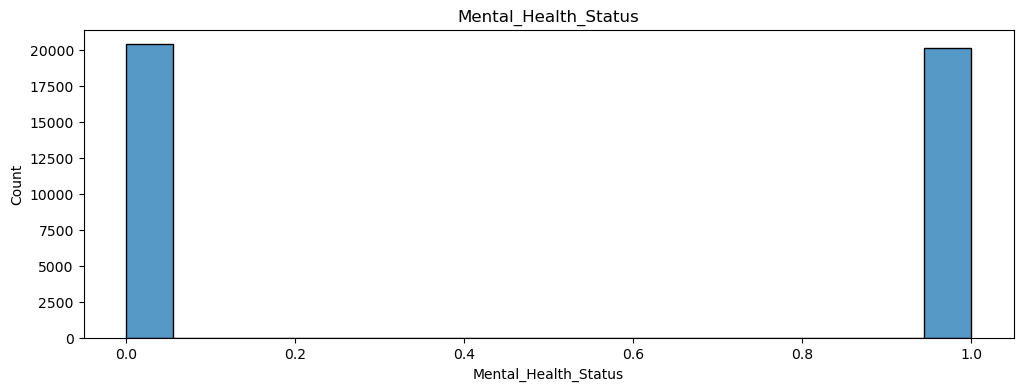

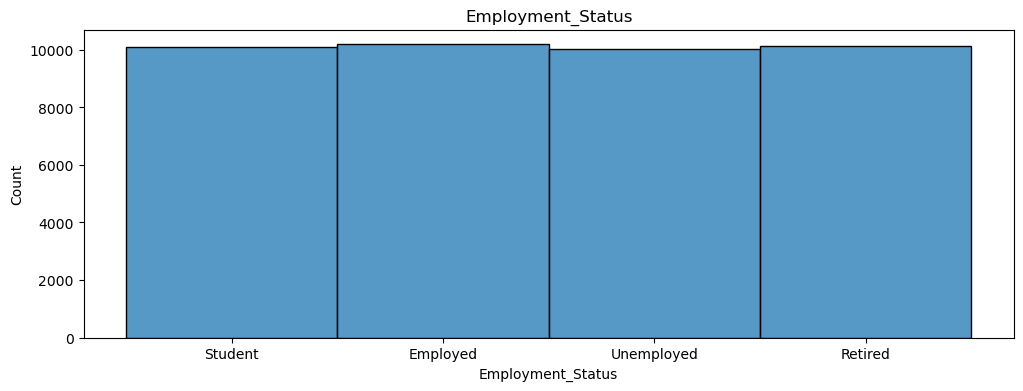

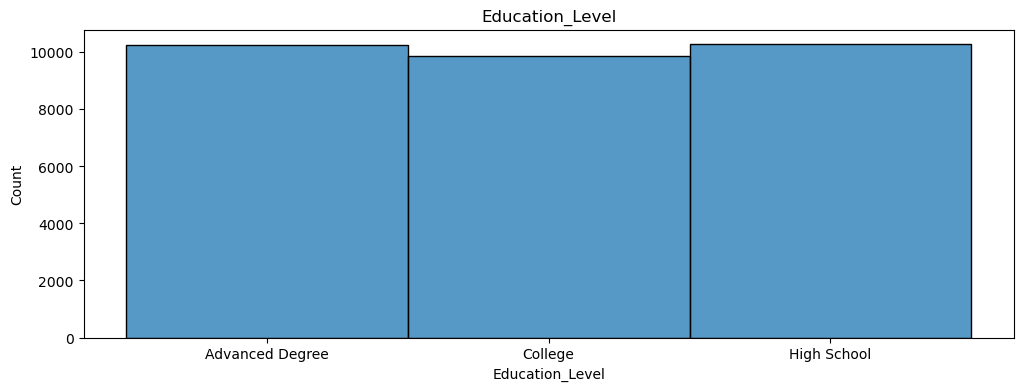

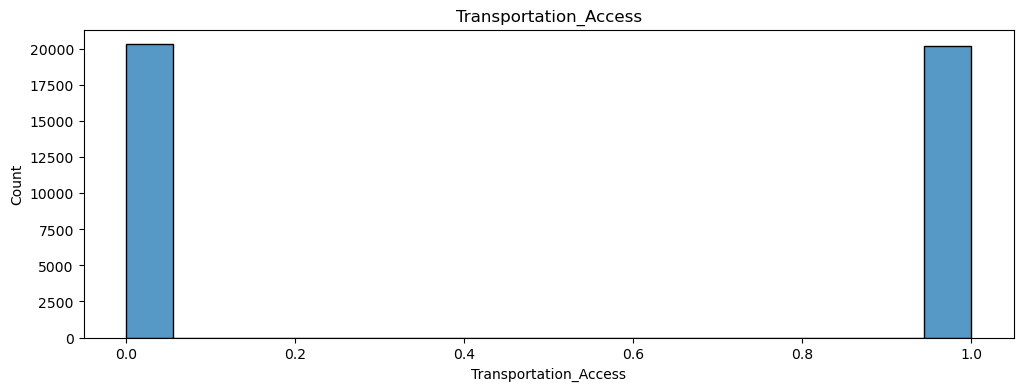

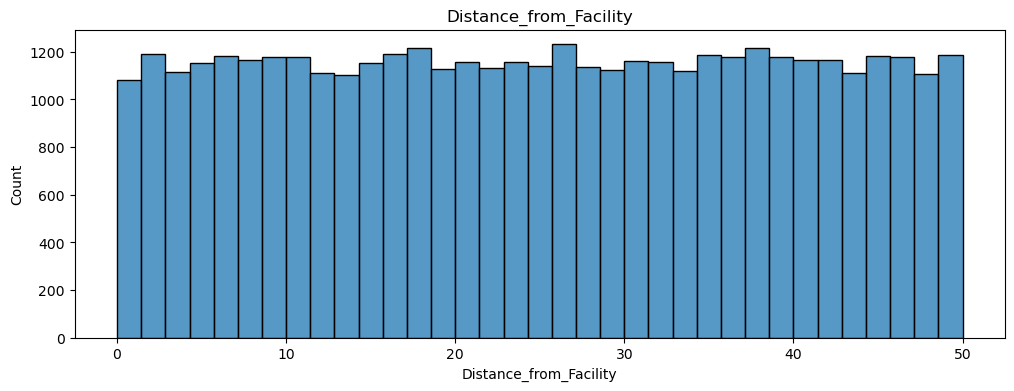

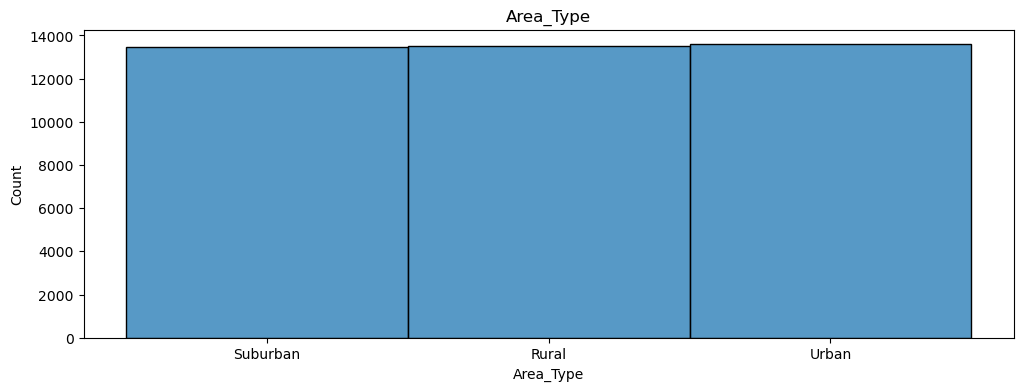

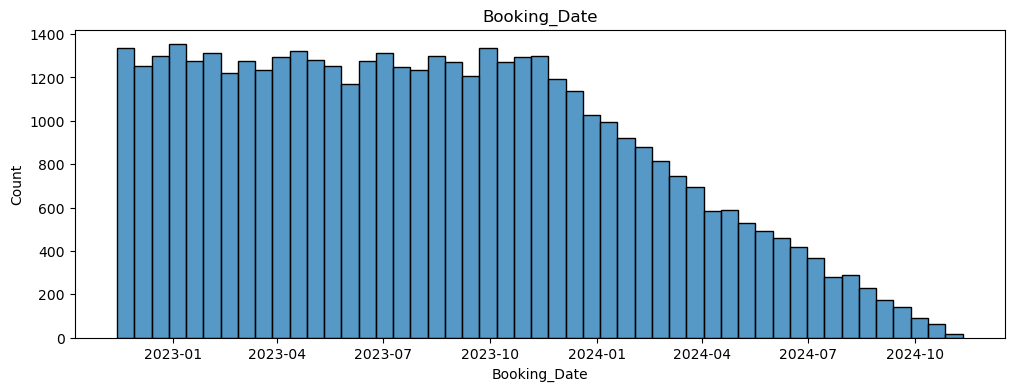

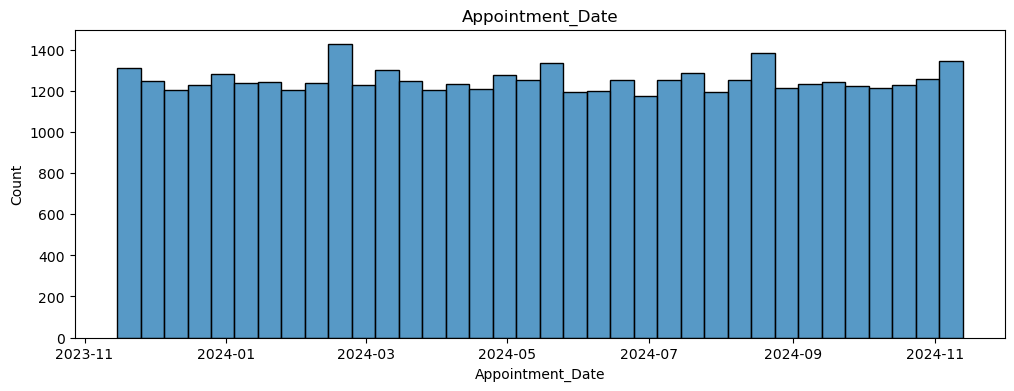

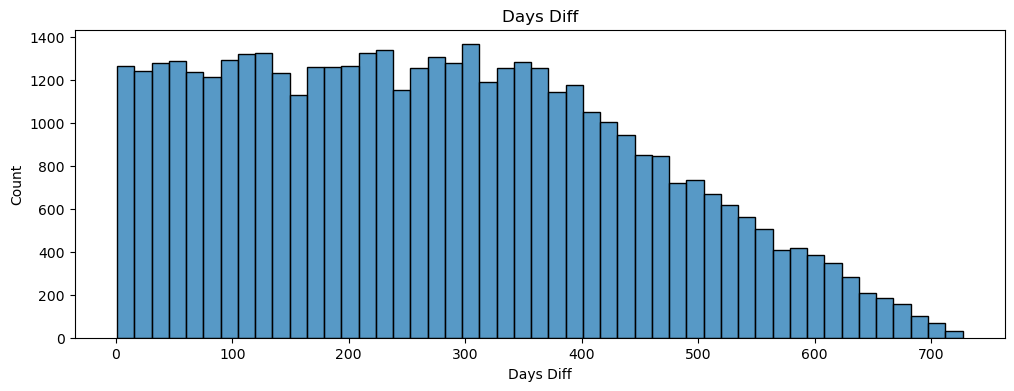

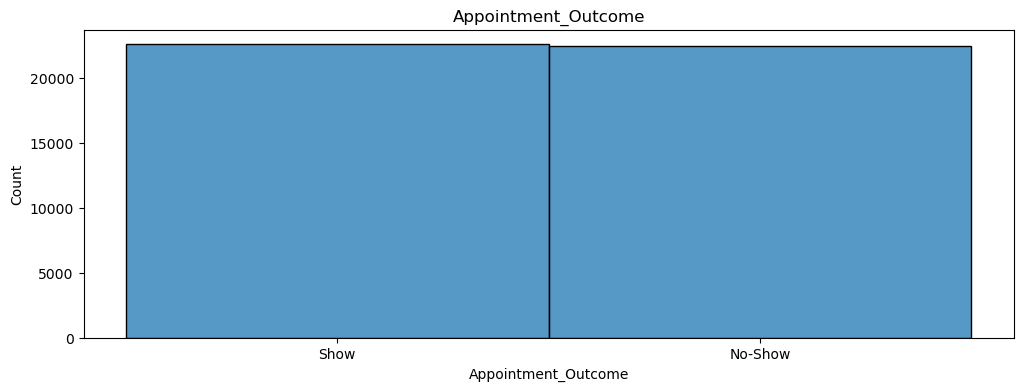

In [7]:
# Really evenly distributed data. Exception: About a 30% drop for patients around age 50. 
for column in noshow_df:
    plt.figure(figsize=(12,4))
    sns.histplot(data=noshow_df[column])
    plt.title(f'{column}')
    plt.show()

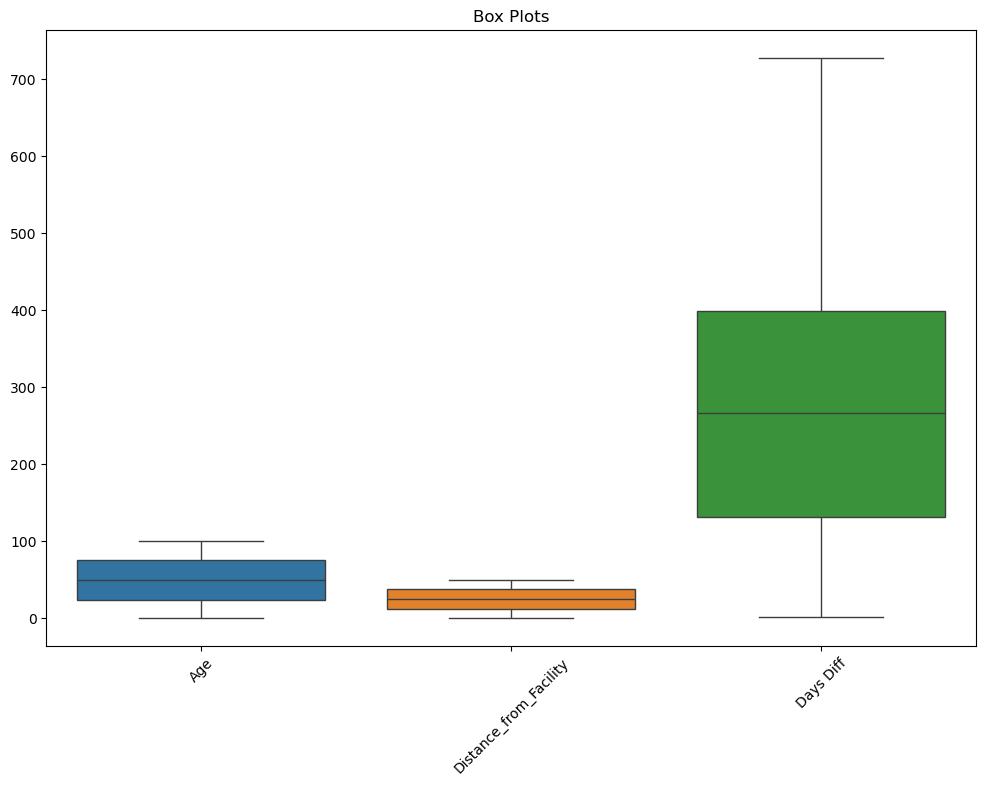

In [8]:
selected_columns = ['Age', 'Insurance_Type', 'Employment_Status', 'Distance_from_Facility', 'Days Diff']

# Create a box plot
plt.figure(figsize=(12, 8))
sns.boxplot(data=noshow_df[selected_columns])
plt.title('Box Plots')
plt.xticks(rotation=45)
plt.show()